* Universidad de Guadalajara
* Centro Universitario de Ciencias Exactas e Ingenierías
* Seminario de Solución de Problemas de Inteligencia Artificial II
* Profesor Dr. Diego Oliva
* Depto. De Ciencias Computacionales
* Ignacio David Vázquez Perez
* 218292866

In [2]:
import numpy as np
import random
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns; sns.set()
from sklearn import metrics 

In [10]:
def step_func(z):
        return 1.0 if (z > 0) else 0.0
def perceptron(X, y, lr, epochs, pretrained = None, pretrained_synaptic_weights = None):
    m, n = X.shape
    #Se crea en vector de pesos de la neurona 
    # con valores aleatorios y bias
    if pretrained == False:
        synaptic_weights = np.zeros((n+1,1))
    elif pretrained != False:
        synaptic_weights = pretrained_synaptic_weights.copy()
    n_error_list = []
    #El algoritmo de entrenamiento se ejecuta por el total de iteraciones
    for epoch in range(epochs):
        n_error = 0
        for idx, x_i in enumerate(X):     
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
             #Se realiza la multiplicación punto por punto de la entrada y los pesos. 
            y_hat = step_func(np.dot(x_i.T, synaptic_weights))
            # Actualizar error
            if (np.squeeze(y_hat) - y[idx]) != 0:
                synaptic_weights += lr*((y[idx] - y_hat)*x_i)
                n_error += 1
    n_error_list.append(n_error)            
    print("synaptic_weights: ", synaptic_weights)
    print("Error porcentual: ", (abs((len(X) - n_error_list[0]) - len(X)) / len(X)) * 100)
    return synaptic_weights, n_error_list
    
def plot_perceptron(X, theta, y):   
    # y=mx+c
    # mx+c = theta0.X0 + theta1.X1 + theta2.X2
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -theta[1]/theta[2]
    c = -theta[0]/theta[2]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==-1], X[:, 1][y==-1], "r^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.title('Algoritmo de perceptron')
    plt.plot(x1, x2, 'y-')

In [11]:
# activation function for output layer
def linear(z, derivative=False):
    a = z.copy()
    if derivative:
        da = np.ones(z.shape)
        return a, da
    return a
def logistic(z, derivative=False):
    a = 1/(1 + np.exp(-z))
    if derivative:
        da = np.ones(z.shape)
        return a, da
    return a
def softmax(z, derivative=False):
    e = np.exp(z - np.max(z, axis=0))
    a = e / np.sum(e, axis=0)
    if derivative:
        da = np.ones(z.shape)
        return a, da
    return a
# activation functions for hidden layers
def tanh(z, derivative=False):
    a = np.tanh(z)
    if derivative:
        da = (1 - a) * (1 + a)
        return a, da
    return a

def relu(z, derivative=False):
    a = np.tanh(z)
    if derivative:
        da = (1 - a) * (1 + a)
        return a, da
    return a

def logistic_hidden(z, derivative=False):
    a = 1/(1 + np.exp(-z))
    if derivative:
        da = a * (1 - a)
        return a, da
    return a

In [12]:
class MLP:
    def __init__(self, layers_dims, hidden_activation=tanh, output_activation=logistic):
        self.L = len(layers_dims) - 1
        self.w = [None] * (self.L + 1)
        self.b = [None] * (self.L + 1)
        self.f = [None] * (self.L + 1)
        # initialize weights
        for l in range(1, self.L + 1):
            self.w[l] = -1 + 2 * np.random.rand(layers_dims[l], layers_dims[l - 1])
            self.b[l] = -1 + 2 * np.random.rand(layers_dims[l], 1)
            if l == self.L:
                self.f[l] = output_activation
            else:
                self.f[l] = hidden_activation
    def predict(self, X):
        a = np.asanyarray(X)
        for l in range(1, self.L + 1):
            z = np.dot(self.w[l], a) + self.b[l]
            a = self.f[l](z)
        return a
    def train(self, X, Y, epochs=500, lr=0.1):
        P = X.shape[1]
        for _ in range(epochs):
            for p in range(P):
                # initialize activations
                a = [None] * (self.L + 1)
                da = [None] * (self.L + 1)
                lg = [None] * (self.L + 1)
                # propagation
                a[0] = X[:,p].reshape(-1,1)
                for l in range(1, self.L + 1):
                    z = np.dot(self.w[l], a[l-1]) + self.b[l]
                    a[l], da[l] = self.f[l](z, derivative=True)
                # backpropagation
                for l in range(self.L, 0, -1):
                    if l == self.L:
                        lg[l] = (Y[:,p].reshape(-1,1) - a[l]) * da[l]
                    else:
                        lg[l] = np.dot(self.w[l+1].T, lg[l + 1]) * da[l]
                # gradient descent
                for l in range(1, self.L + 1):
                    self.w[l] += lr * np.dot(lg[l], a[l - 1].T)
                    self.b[l] += lr * lg[l]

In [13]:
def MLP_binary_classification_2d(X,Y,net):
    plt.figure()
    for i in range(X.shape[1]):
        if Y[0,i]==1:
            plt.plot(X[0,i], X[1,i], '.r')
        else:
            plt.plot(X[0,i], X[1,i], '.b')
    xmin, ymin=np.min(X[0,:])-0.5, np.min(X[1,:])-0.5
    xmax, ymax=np.max(X[0,:])+0.5, np.max(X[1,:])+0.5
    xx, yy = np.meshgrid(np.linspace(xmin,xmax, 100), 
                         np.linspace(ymin,ymax, 100))
    data = [xx.ravel(), yy.ravel()]
    zz = net.predict(data)
    zz = zz.reshape(xx.shape)
    plt.contourf(xx,yy,zz, alpha=0.8, 
                 cmap=plt.cm.RdBu)
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    plt.grid()
    plt.show()

# Practica 1
## Perceptrón Simple y Multicapa

1. Objetivos
* Aplicar diferentes arquitecturas de redes neuronales a la clasificación automática de datos reales.
* Verificar experimentalmente las limitaciones del método de separación por hiperplanos.
* Profundizar en los conceptos teóricos relacionados con la retro-propagación del error.
* Implementar un algoritmo de entrenamiento para el perceptrón multicapa y analizar su desempeño.
* Utilizar diferentes técnicas de validación cruzada y valorar su importancia.

2. Actividades

**Ejercicio 1**:
Realice un programa que permita el entrenamiento y prueba de un perceptrón simple
con una cantidad variable de entradas. El programa debe realizar lo siguiente:
- Lectura de los patrones de entrenamiento (entradas y salidas) desde un archivo en formato
texto separado por comas.
- Selección del criterio de finalización del entrenamiento.
- Selección del número máximo de épocas de entrenamiento.
- Selección de la tasa de aprendizaje.
- Prueba del perceptrón entrenado en datos reales.

Una vez que se generó el programa, debe ser probado considerando lo siguiente:
1. Problema XOR. Los patrones para este problema son los puntos (1,1), (1,-1), (-1,1), (-1,-1).
Además, deben considerarse alteraciones aleatorias (< 5%). Se debe generar un set de
entrenamiento y otro de prueba. Utilizar los archivos XORtrn.csv y XORtst.csv
2. Mostrar gráficamente los patrones utilizado y la recta que los separa.

### Generación de dataset

In [7]:
train_dataset  = np.genfromtxt('XOR_trn.csv', delimiter=',')
test_dataset = np.genfromtxt('XOR_tst.csv', delimiter=',')

In [8]:
X_train = train_dataset[:,0:2]
y_train = train_dataset[:,2]
X_test = test_dataset[:,0:2]
y_test = test_dataset[:,2]

In [9]:
X_train

array([[-1.0291 ,  0.97256],
       [ 1.0325 , -1.0188 ],
       [ 1.0261 ,  1.0343 ],
       ...,
       [ 0.98116, -0.99778],
       [-1.0046 , -0.99967],
       [-1.     ,  0.98807]])

### Graficar el dataset de entrenamiento

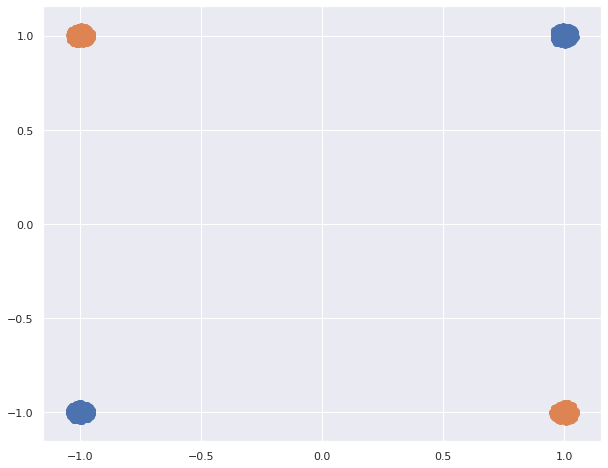

In [7]:
fig = plt.figure(figsize=(10,8))
plt.scatter(train_dataset[:, 0][train_dataset[:,2]==-1], train_dataset[:, 1][train_dataset[:,2]==-1])
plt.scatter(train_dataset[:, 0][train_dataset[:,2]==1], train_dataset[:, 1][train_dataset[:,2]==1])

### Graficar el dataset de validación

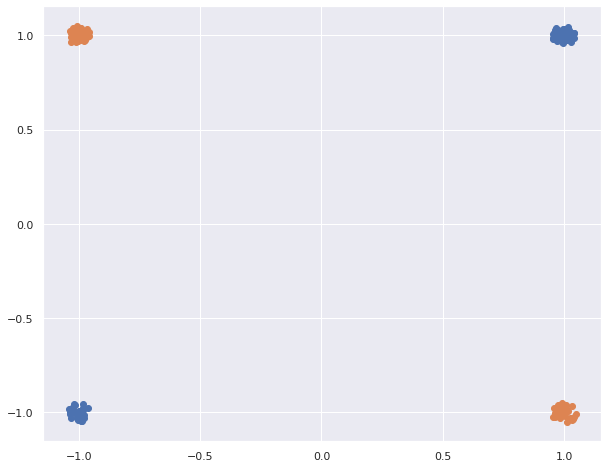

In [191]:
# Plotting
fig = plt.figure(figsize=(10,8))
plt.scatter(test_dataset[:, 0][test_dataset[:,2]==-1], test_dataset[:, 1][test_dataset[:,2]==-1])
plt.scatter(test_dataset[:, 0][test_dataset[:,2]==1], test_dataset[:, 1][test_dataset[:,2]==1])

### Perceptrón simple con problema XOR

#### Entrenamiento

synaptic_weights:  [[-26.16      ]
 [  1.29144375]
 [-23.76005725]]
Error porcentual:  99.85000000000001


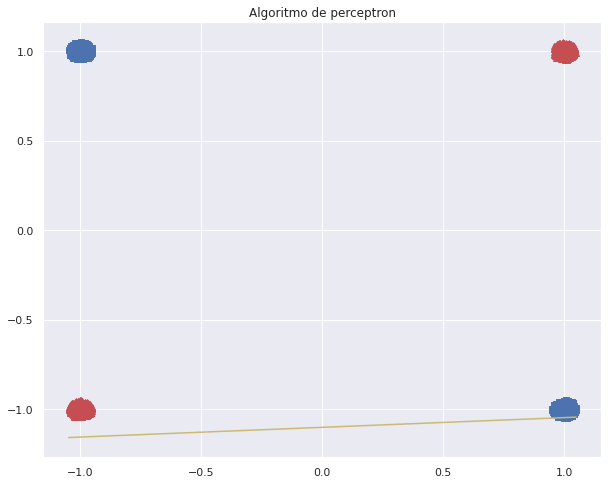

In [9]:
#train
synaptic_weights, n_error_list = perceptron(X_train ,y_train, lr = 0.005, epochs = 300, pretrained= False)
plot_perceptron(X_train, synaptic_weights, y_train)

#### Validación

synaptic_weights:  [[-26.16000002]
 [  1.29144372]
 [-23.76005724]]
Error porcentual:  99.5


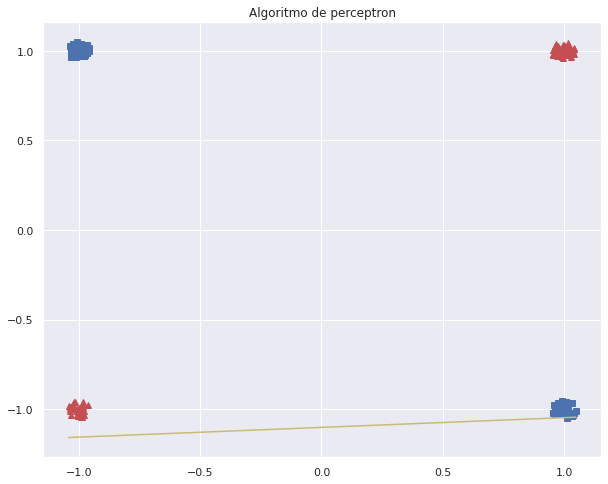

In [10]:
# test
synaptic_weights, n_error_list = perceptron(X_test,y_test, lr = 0.000000000001, epochs = 1000, pretrained= True, pretrained_synaptic_weights = synaptic_weights)
plot_perceptron(X_test, synaptic_weights, y_test)

### Perceptrón Multicapa con problema XOR

#### Se preparan los sets de datos con las dimensiones compatibles

In [14]:
X_train = X_train.T
X_test = X_test.T
y_train = np.expand_dims(y_train, axis=0)
y_test = np.expand_dims(y_test, axis=0)

In [15]:
X_train.shape

(2, 2000)

In [16]:
X_test.shape

(2, 200)

In [17]:
y_train.shape

(1, 2000)

In [18]:
y_test.shape

(1, 200)

### Red multicapa con:
- 200 capas ocultas
- activación oculta RELU
- activación de salida logistic
- 1000 épocas de entrenamiento
- Tasa de aprendizaje de 0.01

#### Se inicializa el objeto de la red multicapa

In [12]:

net = MLP((2,200,1),hidden_activation = relu, output_activation = logistic)

#### Se realiza predicción sin entrenamiento

[[0.50345788 0.0178094  0.0387704  ... 0.01697959 0.01193837 0.50256968]]


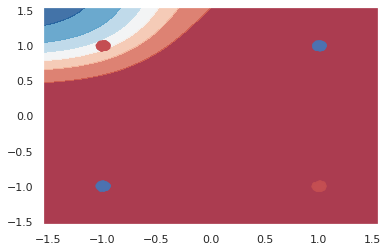

In [19]:

print(net.predict(X_train))
MLP_binary_classification_2d(X_train,y_train,net)

#### Se realiza predicción después del entrenamiento

/tmp/ipykernel_17358/1495947191.py:9: RuntimeWarning: overflow encountered in exp
  a = 1/(1 + np.exp(-z))


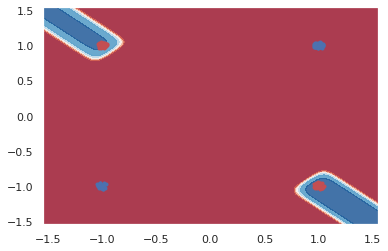

In [20]:
net.train(X_train, y_train,  epochs=1000, lr=0.01)
y_pred = net.predict(X_test)
MLP_binary_classification_2d(X_test,y_test,net)

#### Calcular el error pocentual

In [21]:
y_pred = np.where(y_pred == 0., -1., y_pred)
y_pred = np.where(y_pred > 0, 1., y_pred)
np.sum(y_test == y_pred)
aprox = (y_test == y_pred).sum()
print("Percent error: ", (abs(aprox - y_test.shape[1])/ y_test.shape[1])*100)

Percent error:  0.0


### Red multicapa con:
- 50 capas ocultas
- activación oculta Tanh
- activación de salida linear
- 200 épocas de entrenamiento
- Tasa de aprendizaje de 0.0001

#### Se inicializa el objeto de la red multicapa

In [28]:

net = MLP((2,50,1),hidden_activation = tanh, output_activation = linear)

#### Se realiza predicción sin entrenamiento

[[-0.55180917  0.20719695  2.038664   ...  0.15505182 -2.67551297
  -0.48226133]]


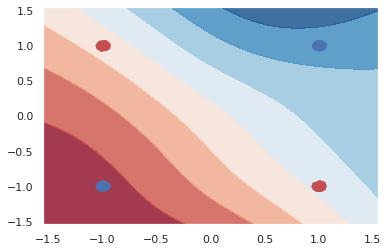

In [29]:

print(net.predict(X_train))
MLP_binary_classification_2d(X_train,y_train,net)

#### Se realiza predicción después del entrenamiento

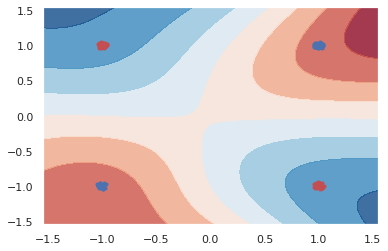

In [34]:
net.train(X_train, y_train,  epochs=200, lr=0.0001)
y_pred = net.predict(X_test)
MLP_binary_classification_2d(X_test,y_test,net)

#### Calcular el error pocentual

In [33]:
y_pred = np.where(y_pred == 0., -1., y_pred)
y_pred = np.where(y_pred > 0, 1., y_pred)
np.sum(y_test == y_pred)
aprox = (y_test == y_pred).sum()
print("Percent error: ", (abs(aprox - y_test.shape[1])/ y_test.shape[1])*100)

Percent error:  56.00000000000001


## Conclusiones

En esta práctica aprendí las limitaciones de las redes de una sola capa, y la complejidad que puede llegar a configurarse en una red de múltiples capas. Para cada tipo de problema hay diferentes propuestas más adecuadas. En el caso de un set de datos que no es linealmente separable, hay distintas funciones de activación que pueden no solamente resolver el problema, sino evitar el sobre ajuste de los datos. Si el modelo tiene una configuración muy estricta, no va a poder clasificar de manera correcta datos con ruido, un margen de error más amplio, aunque disminuya la precisión. Es importante considerar si se pueden presentar anormalidades, y balancear la complejidad del modelo para reducir el costo computacional.